In [ ]:
#ライブラリーのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.model_selection import KFold

In [ ]:
# 訓練データとテストデータの読み込み
df_train = pd.read_csv('train_academic.csv', header=0)
df_test = pd.read_csv('test_academic.csv', header=0)

# テストデータに'Target'列を追加し、Noneに設定
df_test['Target'] = 0

# データセットの識別用ラベルを追加
df_train['label'] = 'train'
df_test['label'] = 'test'

# 列名を訓練データと一致させる
df_test = df_test.reset_index(drop=True)
df_test.columns = df_train.columns

# 訓練データとテストデータを統合
df = pd.concat([df_train, df_test], axis=0)

# データの確認
print(df.dtypes)
print(df.head())

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [ ]:
#目的変数の変換
for i in range(len(df_train['Target'])):
  if df_train['Target'][i] == 'Graduate':
    df_train.at[i, 'Target'] = 0
  elif df_train['Target'][i] == 'Dropout':
    df_train.at[i, 'Target'] = 1
  elif df_train['Target'][i] == 'Enrolled':
    df_train.at[i, 'Target'] = 2

df_train['Target'].head()

0    0
1    1
2    1
3    2
4    0
Name: Target, dtype: object

<Axes: xlabel='Target'>

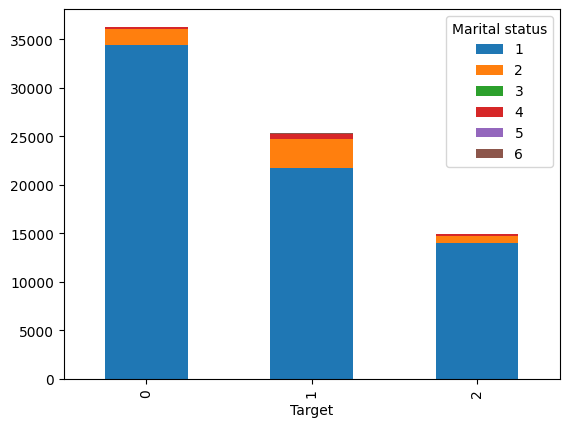

In [ ]:
#TargetとMarfiageの関連性
df_train_Marriage = df_train.groupby('Target')['Marital status'].value_counts().unstack()
df_train_Marriage.plot(kind='bar', stacked=True)


<Axes: xlabel='Target'>

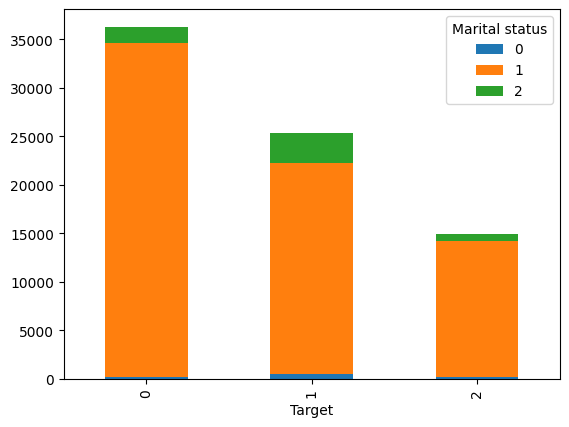

In [ ]:
# Marriageの変換
# 離婚・死別/未婚/既婚・事実婚・別居でわける

# 'Marital status'が3または4の行を2に変更
df.loc[df['Marital status'].isin([3, 4]), 'Marital status'] = 0
# 'Marital status'が2, 5, 6の行を0に変更
df.loc[df['Marital status'].isin([2, 5, 6]), 'Marital status'] = 2

df_train.loc[df_train['Marital status'].isin([3, 4]), 'Marital status'] = 0
df_train.loc[df_train['Marital status'].isin([2, 5, 6]), 'Marital status'] = 2
#TargetとMarfiageの関連性
df_train_Marriage = df_train.groupby('Target')['Marital status'].value_counts().unstack()
df_train_Marriage.plot(kind='bar', stacked=True)

<Axes: xlabel='Target'>

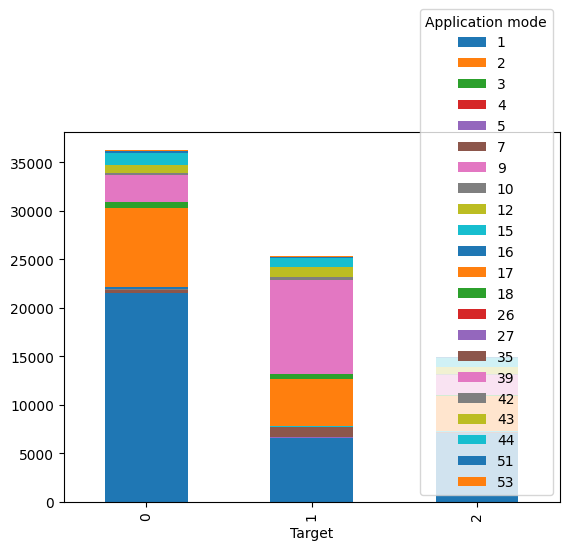

In [ ]:
#TargetとApplication modeの関連性
df_train_Application_mode = df_train.groupby('Target')['Application mode'].value_counts().unstack()
df_train_Application_mode.plot(kind='bar', stacked=True)

<Axes: xlabel='Target'>

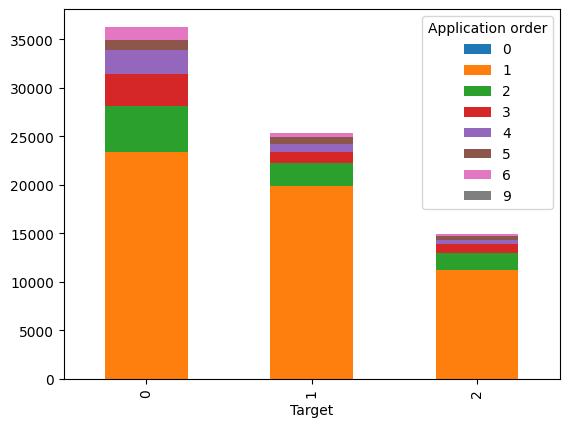

In [ ]:
#TargetとApplication orderの関連性
df_train_Application_order = df_train.groupby('Target')['Application order'].value_counts().unstack()
df_train_Application_order.plot(kind='bar', stacked=True)

<Axes: xlabel='Target'>

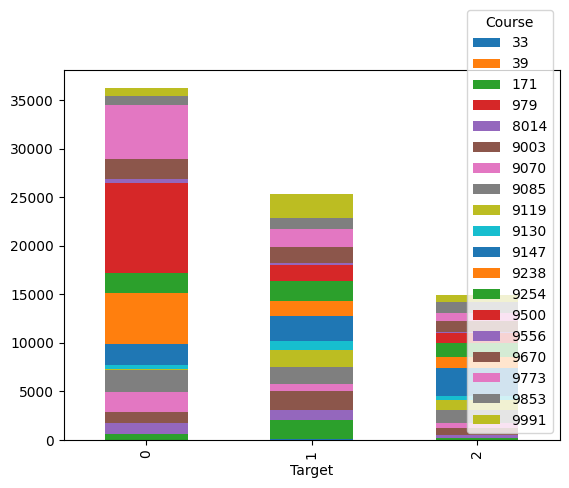

In [ ]:
#TargetとCourseの関連性
df_train_Course = df_train.groupby('Target')['Course'].value_counts().unstack()
df_train_Course.plot(kind='bar', stacked=True)

<Axes: xlabel='Target'>

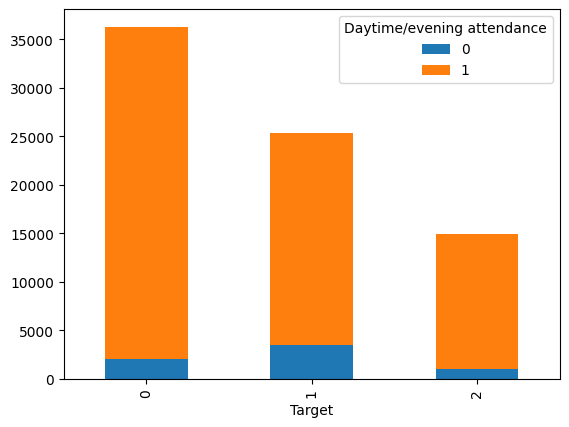

In [ ]:
#Targetと昼間/夜間の出席の関連性
df_train_Daytime_evening_attendance = df_train.groupby('Target')['Daytime/evening attendance'].value_counts().unstack()
df_train_Daytime_evening_attendance.plot(kind='bar', stacked=True)

<Axes: xlabel='Target'>

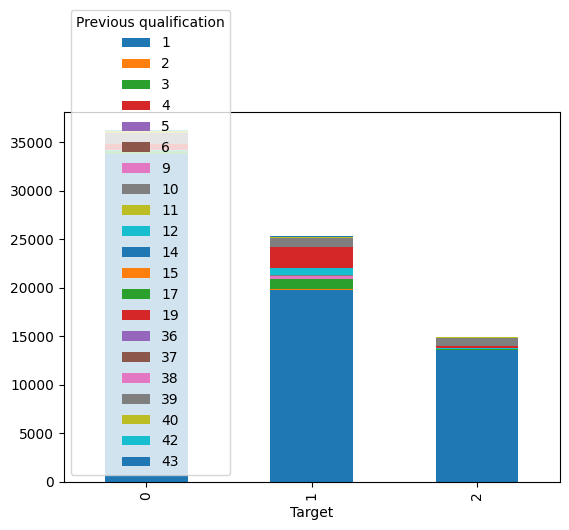

In [ ]:
#Targetと経歴の関連性
df_train_Previous_qualification = df_train.groupby('Target')['Previous qualification'].value_counts().unstack()
df_train_Previous_qualification.plot(kind='bar', stacked=True)

<Figure size 1000x600 with 0 Axes>

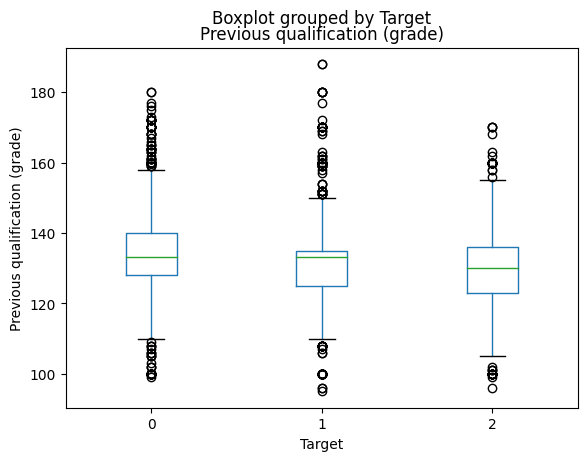

In [ ]:
# 以前の成績とTargetの関係
plt.figure(figsize=(10, 6))
df_train.boxplot(column='Previous qualification (grade)', by='Target', grid=False)
plt.xlabel('Target')
plt.ylabel('Previous qualification (grade)')
plt.show()

<Figure size 1000x600 with 0 Axes>

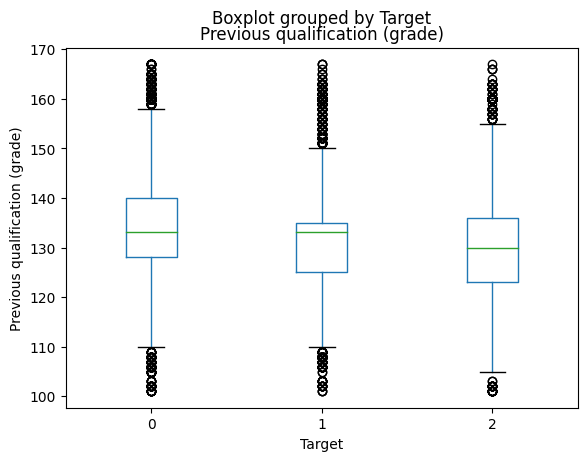

In [ ]:
o = df_train['Previous qualification (grade)'].quantile(0.995)
u = df_train['Previous qualification (grade)'].quantile(0.005)

df_train = df_train[df_train['Previous qualification (grade)'] <= o]
df_train = df_train[df_train['Previous qualification (grade)'] > u]

plt.figure(figsize=(10, 6))
df_train.boxplot(column='Previous qualification (grade)', by='Target', grid=False)
plt.xlabel('Target')
plt.ylabel('Previous qualification (grade)')
plt.show()

<Axes: xlabel='Target'>

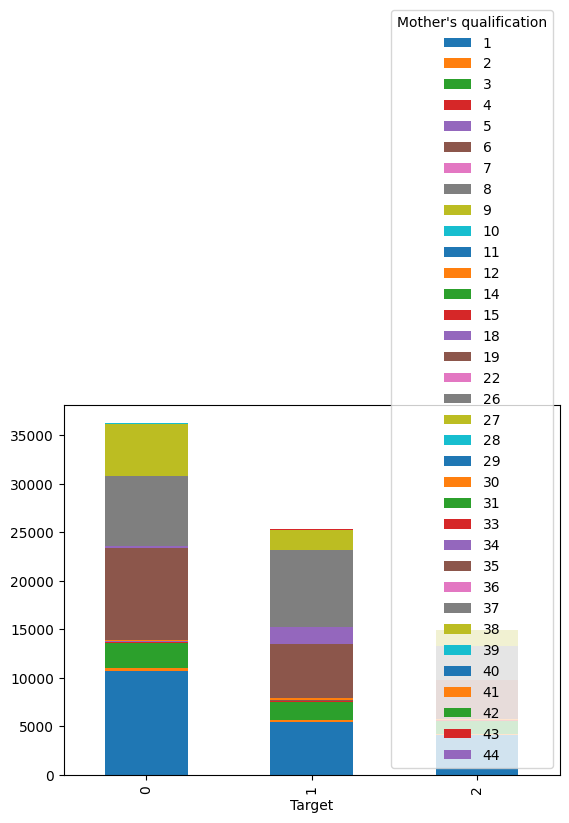

In [ ]:
#Targetと母の学歴関連性
df_train_Mother_qualification = df_train.groupby('Target')["Mother's qualification"].value_counts().unstack()
df_train_Mother_qualification.plot(kind='bar', stacked=True)

<Axes: xlabel='Target'>

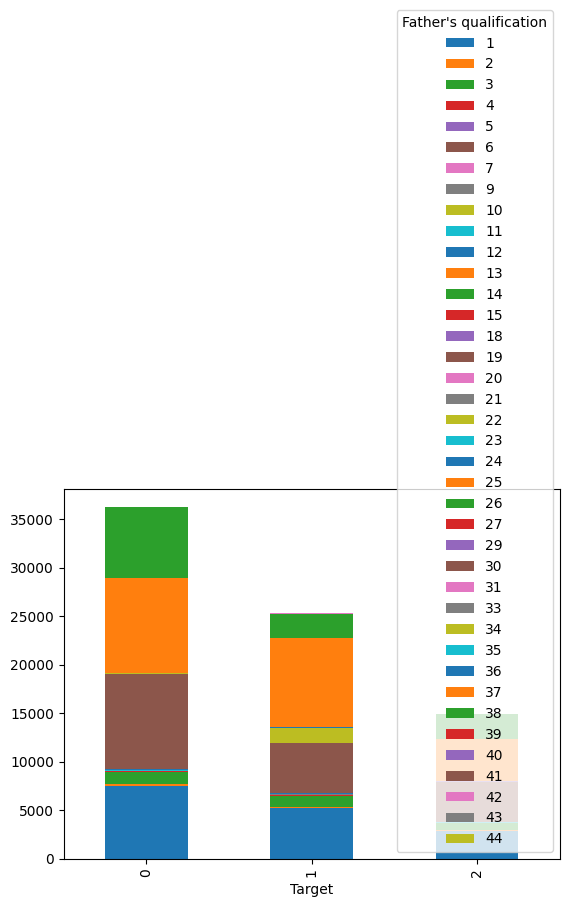

In [ ]:
#Targetと父の学歴の関連性
df_train_Father_qualification = df_train.groupby('Target')["Father's qualification"].value_counts().unstack()
df_train_Father_qualification.plot(kind='bar', stacked=True)

<Axes: xlabel='Target'>

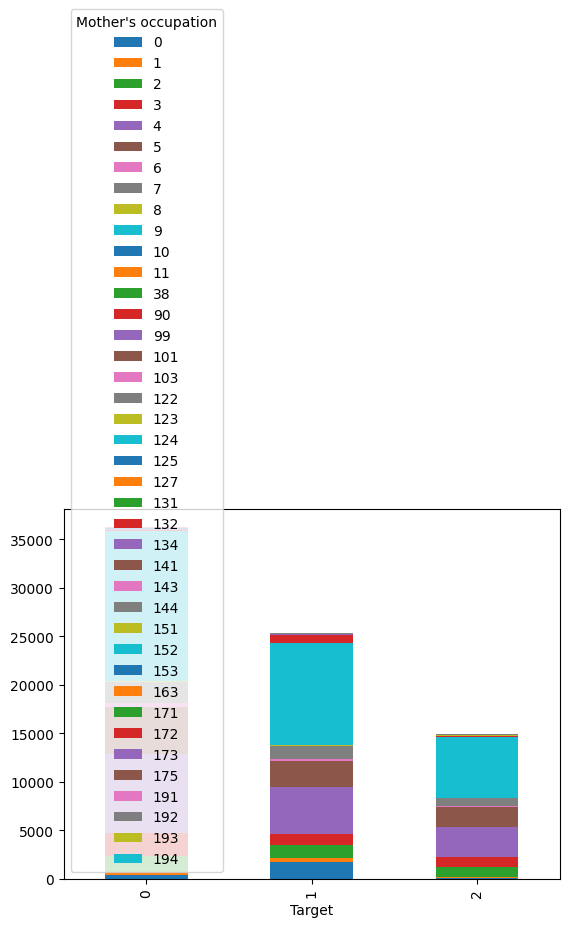

In [ ]:
#Targetと母親の職業の関連性
df_train_Mother_occupation = df_train.groupby('Target')["Mother's occupation"].value_counts().unstack()
df_train_Mother_occupation.plot(kind='bar', stacked=True)

<Axes: xlabel='Target'>

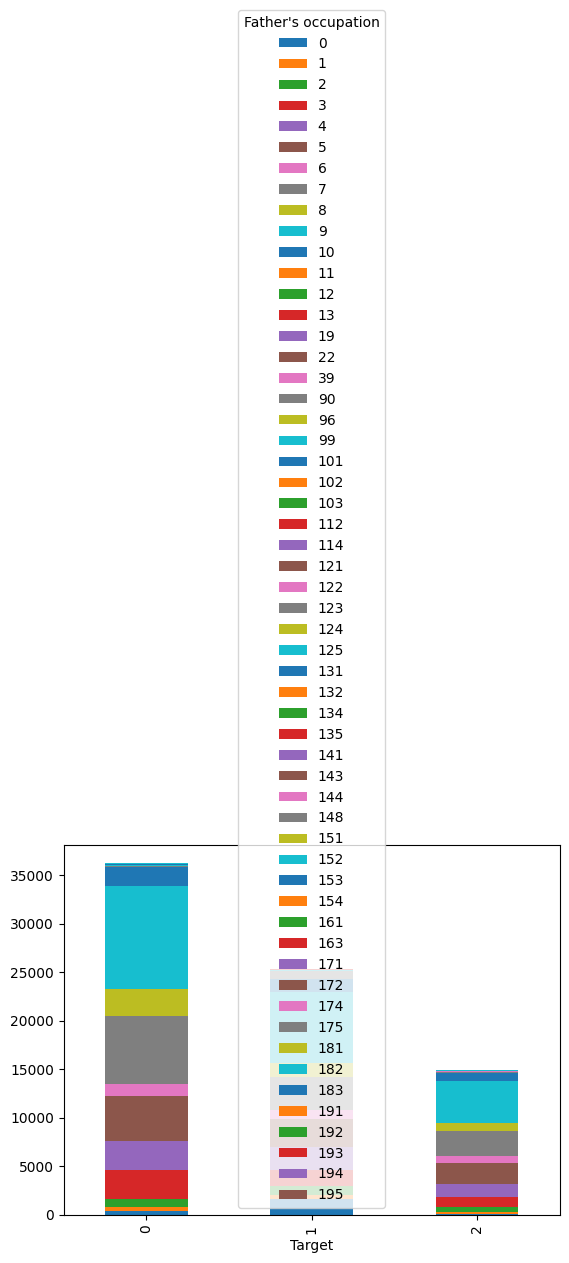

In [ ]:
#Targetと父親の職業の関連性
df_train_Father_occupation = df_train.groupby('Target')["Father's occupation"].value_counts().unstack()
df_train_Father_occupation.plot(kind='bar', stacked=True)

<Figure size 1000x600 with 0 Axes>

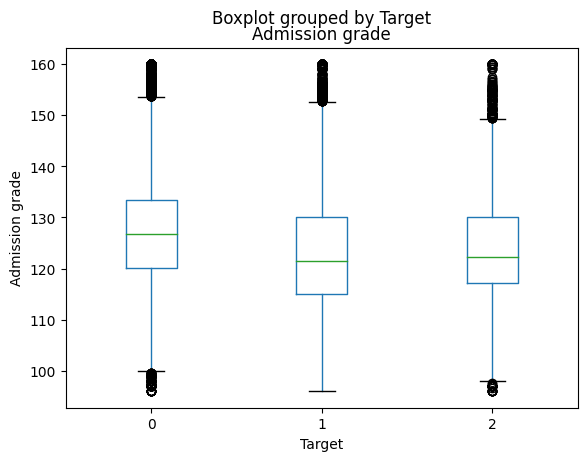

In [ ]:
o = df_train['Admission grade'].quantile(0.995)
u = df_train['Admission grade'].quantile(0.005)

df_train = df_train[df_train['Admission grade'] <= o]
df_train = df_train[df_train['Admission grade'] > u]

# 以前の成績とTargetの関係
plt.figure(figsize=(10, 6))
df_train.boxplot(column='Admission grade', by='Target', grid=False)
plt.xlabel('Target')
plt.ylabel('Admission grade')
plt.show()

<Axes: xlabel='Target'>

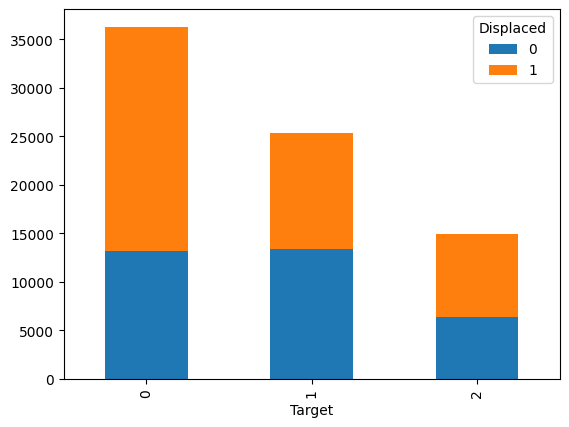

In [ ]:
#Targetと避難民の関連性
df_train_Displaced = df_train.groupby('Target')["Displaced"].value_counts().unstack()
df_train_Displaced.plot(kind='bar', stacked=True)

Target  Educational special needs
0       0                            36149
        1                              133
1       0                            25202
        1                               94
2       0                            14881
        1                               59
Name: count, dtype: int64

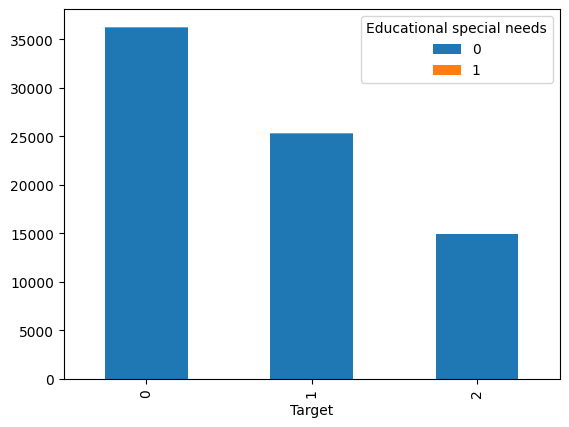

In [ ]:
#Targetと教育的特別支援の関連性
df_train_Educational_special_needs = df_train.groupby('Target')["Educational special needs"].value_counts().unstack()
df_train_Educational_special_needs.plot(kind='bar', stacked=True)

df_train.groupby('Target')["Educational special needs"].value_counts()

<Axes: xlabel='Target'>

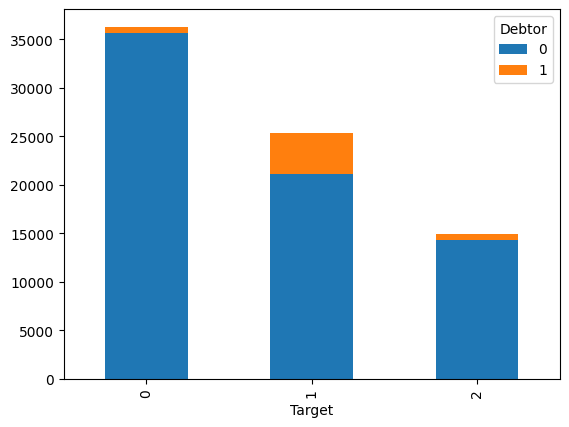

In [ ]:
#Targetと借金の関連性
df_train_Debtor = df_train.groupby('Target')["Debtor"].value_counts().unstack()
df_train_Debtor.plot(kind='bar', stacked=True)

<Axes: xlabel='Target'>

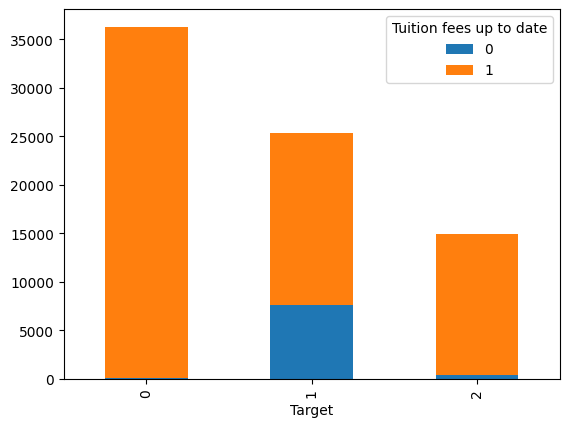

In [ ]:
#Targetと授業料支払いの関連性
df_train_Tuition = df_train.groupby('Target')["Tuition fees up to date"].value_counts().unstack()
df_train_Tuition.plot(kind='bar', stacked=True)

<Axes: xlabel='Target'>

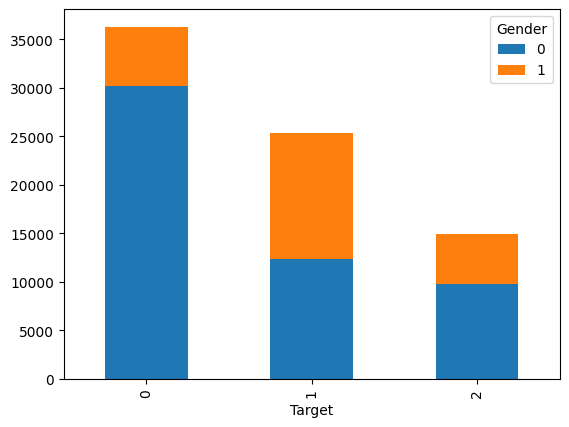

In [ ]:
#Targetと性別の関連性
df_train_gender = df_train.groupby('Target')["Gender"].value_counts().unstack()
df_train_gender.plot(kind='bar', stacked=True)

<Axes: xlabel='Target'>

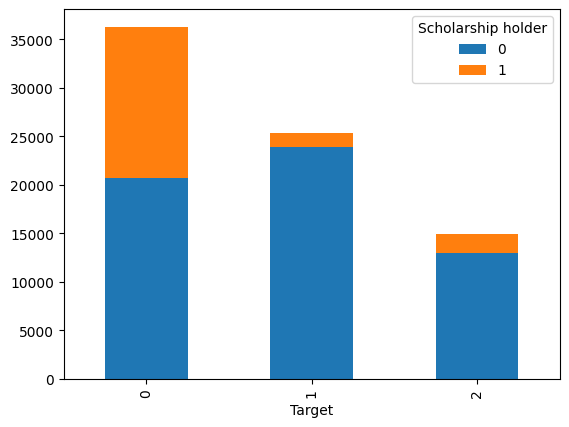

In [ ]:
#Targetと奨学金受給の関連性
df_train_Scholarship = df_train.groupby('Target')["Scholarship holder"].value_counts().unstack()
df_train_Scholarship.plot(kind='bar', stacked=True)

<Figure size 1000x600 with 0 Axes>

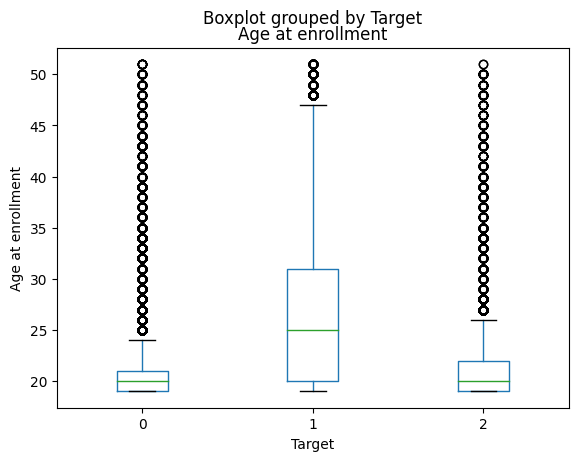

In [ ]:
o = df_train['Age at enrollment'].quantile(0.995)
u = df_train['Age at enrollment'].quantile(0.005)

df_train = df_train[df_train['Age at enrollment'] <= o]
df_train = df_train[df_train['Age at enrollment'] > u]

# 年齢とTargetの関係
plt.figure(figsize=(10, 6))
df_train.boxplot(column='Age at enrollment', by='Target', grid=False)
plt.xlabel('Target')
plt.ylabel('Age at enrollment')
plt.show()

<Axes: xlabel='Target'>

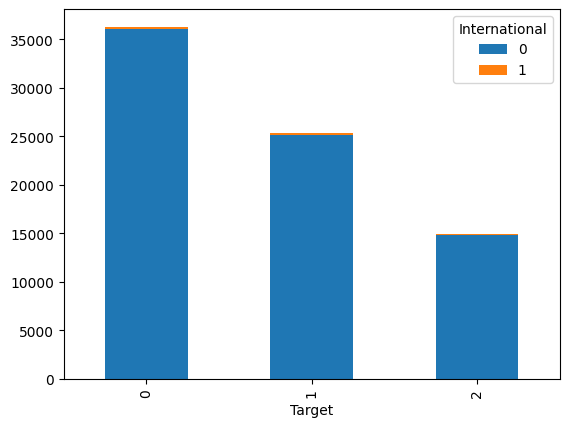

In [ ]:
#Targetと国際学生の関連性
df_train_International = df_train.groupby('Target')["International"].value_counts().unstack()
df_train_International.plot(kind='bar', stacked=True)

<Figure size 1000x600 with 0 Axes>

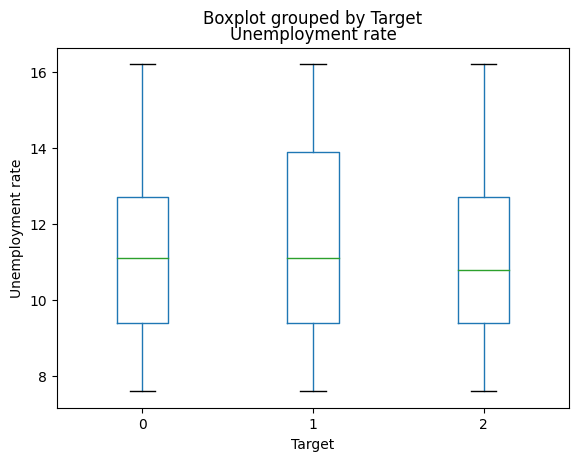

In [ ]:
# 失業率とTargetの関係
plt.figure(figsize=(10, 6))
df_train.boxplot(column='Unemployment rate', by='Target', grid=False)
plt.xlabel('Target')
plt.ylabel('Unemployment rate')
plt.show()

<Figure size 1000x600 with 0 Axes>

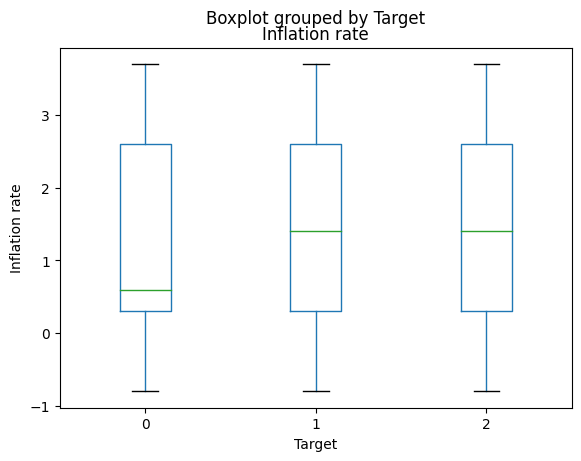

In [ ]:
# インフレ率とTargetの関係
plt.figure(figsize=(10, 6))
df_train.boxplot(column='Inflation rate', by='Target', grid=False)
plt.xlabel('Target')
plt.ylabel('Inflation rate')
plt.show()

<Figure size 1000x600 with 0 Axes>

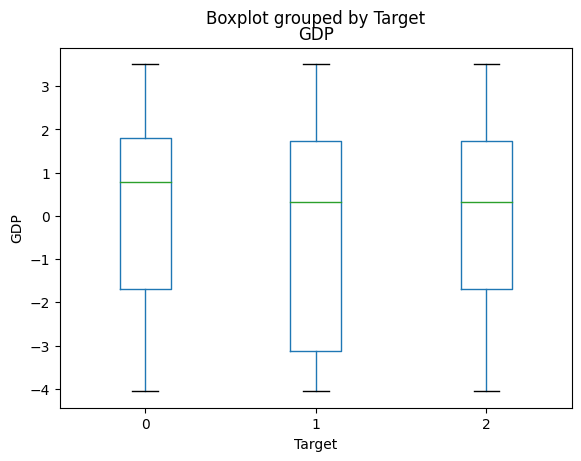

In [ ]:
# GDPとTargetの関係
plt.figure(figsize=(10, 6))
df_train.boxplot(column='GDP', by='Target', grid=False)
plt.xlabel('Target')
plt.ylabel('GDP')
plt.show()

In [ ]:
df['Curricular units 1st sem (grade)(add)'] = df['Curricular units 1st sem (grade)']**2
df['Curricular units 1st sem (grade)(add)'].head(10)
df['Curricular units 2nd sem (grade)(add)'] = df['Curricular units 2nd sem (grade)']**2

In [ ]:
#ワンホットエンコーディング
df = pd.get_dummies(df, columns=["Father's occupation"])
df = pd.get_dummies(df, columns=["Mother's occupation"])
df = pd.get_dummies(df, columns=["Father's qualification"])
df = pd.get_dummies(df, columns=["Mother's qualification"])
df = pd.get_dummies(df, columns=["Previous qualification (grade)"])
df = pd.get_dummies(df, columns=["Application mode"])
df = pd.get_dummies(df, columns=["Application order"])
df = pd.get_dummies(df, columns=["Course"])
df = pd.get_dummies(df, columns=["Previous qualification"])

In [ ]:
df_train = df[df['label'] == 'train']
df_test = df[df['label'] == 'test']
df_test = df_test.drop(['Target'], axis=1)


In [ ]:
#目的変数の変換
for i in range(len(df_train['Target'])):
  if df_train['Target'][i] == 'Graduate':
    df_train.at[i, 'Target'] = 0
  elif df_train['Target'][i] == 'Dropout':
    df_train.at[i, 'Target'] = 1
  elif df_train['Target'][i] == 'Enrolled':
    df_train.at[i, 'Target'] = 2

df_train['Target'].head()

0    0
1    1
2    1
3    2
4    0
Name: Target, dtype: object

In [ ]:
X = df_train.drop(['id','label','Target','International','Educational special needs'],axis=1)
y = df_train[['Target']]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=7)
print(X.columns)
print(y.columns)
#,"Mother's qualification","Mother's occupation","Father's qualification","Father's occupation"

Index(['Marital status', 'Daytime/evening attendance', 'Nacionality',
       'Admission grade', 'Displaced', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       ...
       'Previous qualification_19', 'Previous qualification_36',
       'Previous qualification_37', 'Previous qualification_38',
       'Previous qualification_39', 'Previous qualification_40',
       'Previous qualification_42', 'Previous qualification_43',
       'Curricular units 1st sem (grade)(add)',
       'Curricular units 2nd sem (grade)(add)'],
      dtype='object', length=409)
Index(['Target'], dtype='object')


In [ ]:
#LightGBM
from sklearn.model_selection import KFold
import lightgbm as lgb
y_train_encoded = y_train['Target'].values
lgbm_params = {'objective': 'multiclass', 'num_class':3,'random_state': 7}
lgb_train = lgb.Dataset(X_train, y_train_encoded)
model = lgb.train(lgbm_params, lgb_train ,num_boost_round=100)
#重要度特徴量
model.feature_importance()
importance = pd.DataFrame(model.feature_importance(), index=X_train.columns, columns=['importance'])
importance = importance.sort_values('importance', ascending=True)
df_train_top30 = importance.tail(30).index
df_train_top50 = importance.tail(50).index
df_train_top70 = importance.tail(70).index
df_train_top100 = importance.tail(100).index


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.292695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1111
[LightGBM] [Info] Number of data points in the train set: 57388, number of used features: 50
[LightGBM] [Info] Start training from score -0.744892
[LightGBM] [Info] Start training from score -1.106976
[LightGBM] [Info] Start training from score -1.636514


In [ ]:
# 新しいデータセットを作成
X = df_train[df_train_top50]
y = df_train[['Target']]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=7)

#XGBoost
gbc = GradientBoostingClassifier(max_depth=8)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train['Target'])
y_test_encoded = le.transform(y_test['Target']) # Use the same encoder to transform y_test
gbc.fit(X_train,y_train_encoded)
gbc.score(X_test,y_test_encoded)

0.8276529012023001

In [ ]:
# Get the common columns between training top features and test set
common_cols = df_train_top50.intersection(df_test.columns)

# Select these common columns for prediction
X = df_test[common_cols]

# Now predict using the common columns
y_pred = gbc.predict_proba(X)
#結果をCSV形式で保存
df_test = pd.DataFrame(y_pred)
df_test.to_csv('drive/MyDrive/submission.csv', index=False)
print(y_pred[:10])


[[0.00203658 0.99583418 0.00212925]
 [0.98245913 0.00788088 0.00965999]
 [0.62349538 0.0829187  0.29358592]
 [0.25511301 0.27420747 0.47067952]
 [0.05016634 0.29190693 0.65792673]
 [0.98347799 0.00898308 0.00753893]
 [0.94729085 0.02361383 0.02909533]
 [0.92077125 0.01946978 0.05975897]
 [0.10574889 0.82814485 0.06610626]
 [0.92006729 0.02185001 0.0580827 ]]


In [ ]:
import math
#logX(T) :Xが底
t=math.log2(1.2)
print(t)
u=math.log10(1.2)
print(u)

0.2630344058337938
0.07918124604762482
